<a href="https://colab.research.google.com/github/njamieson2014/statss/blob/main/Copy_of_Alexnet_Load_Slides_All_Hahn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
import wandb as wb

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #assigns device to be used as CUDA. if cuda is not available, it will use the cpu

def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device) #creates a pytorch tensor with the inputted data and the specified device (from the first line)

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=device) #creates a pytorch tensor with the inputted data using the specified device, but without computing the gradient during optimization. This is useful for data tensors that are not involved in model training

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()  #creates a plot using an input array "x" in grayscale and 5inches by inches

def get_google_slide(url): #takes a google slides presentation url and converts it into a pdf
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5] #adds the url of the presentation to the above link
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url): #takes the slides from the presentation and converts them to images and then displays the images using the pdf created above
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image, size=224):
    means = [0.485, 0.456, 0.406]
    stds = [0.229, 0.224, 0.225]
    transform = transforms.Compose([
        transforms.Resize(size),
        transforms.CenterCrop(size),
        transforms.ToTensor(),
        transforms.Normalize(means, stds)
    ])
    tensor = transform(image).unsqueeze(0).to(device)
    tensor.requires_grad = True
    return tensor #this function proccesses an inputted image by resizing, center cropping, converting it to a tensor, normalizing it, and adding another dimension to it. This is used to make the image suitable to input into a nueral network



In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval(); #loads a pre-trained alexnet model and and a set of labels for classifying the images, on the specified device

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 144MB/s]


In [ ]:
url = "https://docs.google.com/presentation/d/17Nxy2Wo0erk71fp4sCDQqHrHYkxwjdExjbosjoEewuU/edit#slide=id.p"

In [ ]:
images = [] #initializes an empty list to store the images from the google presnetation

for image in get_slides(url): #iterates for each slide in the presentation

    plot(image) #plots the current image

    images.append(load(image)) #process the image using the above "load" function and appends it to the list "images"

images = torch.vstack(images) #vertically stacks the list of images into a single tensor

In [ ]:
images.shape #50 images, 3 color channels, dimensions

torch.Size([50, 3, 224, 224])

In [ ]:
model(images) #using the alexnet model to return a tesnsor containing the predicted probabilities for each image class

tensor([[-1.7277,  2.7394, -7.0347,  ...,  3.2731, 11.2839, -2.2833],
        [-4.6425, -1.9246, -6.0783,  ...,  4.2339, 11.9370,  0.2143],
        [-2.7203,  1.1848, -8.0670,  ...,  1.7115, 11.7991, -0.8466],
        ...,
        [ 0.3832,  0.4531, -2.1673,  ..., -2.5195,  0.1401,  0.9634],
        [ 0.3832,  0.4531, -2.1673,  ..., -2.5195,  0.1401,  0.9634],
        [ 0.3832,  0.4531, -2.1673,  ..., -2.5195,  0.1401,  0.9634]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)

In [ ]:
y.shape

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy() #extracts the predicted results from the alexnet model and stores them in a numpy array named "guesses"

In [ ]:
for i in list(guesses):
    print(labels[i]) #goes through the lsit of predicted labels and prints each one

spaghetti squash
orange
orange
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paper

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1 #sets up an array with 0's from 0-24 and 1's from 25-50

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# Y = np.zeros(100,)
# Y[50:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy() #takes a tensory y, and converts it to a numpy array X

In [ ]:
X.shape

(50, 1000)

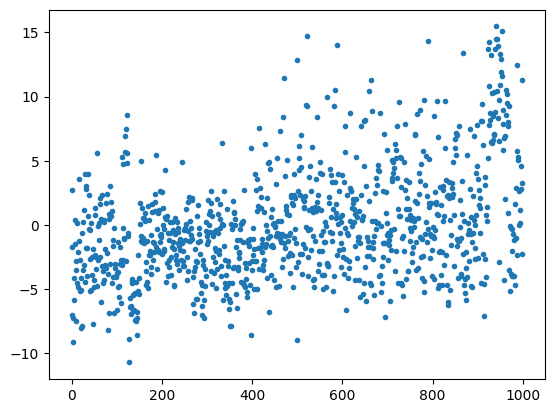

In [ ]:
plt.plot(X[0],'.') #plot the guesses of the alexnet

(array([  7.,  50., 205., 289., 220.,  98.,  58.,  43.,  15.,  15.]),
 array([-10.69981098,  -8.08401108,  -5.4682107 ,  -2.85241079,
         -0.23661061,   2.37918949,   4.9949894 ,   7.61078978,
         10.22659016,  12.84239006,  15.45818996]),
 <BarContainer object of 10 artists>)

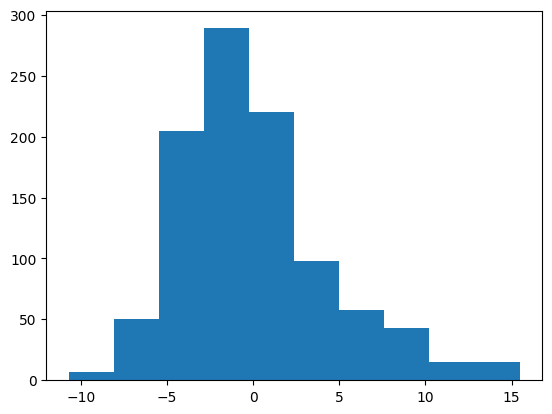

In [ ]:
plt.hist(X[0]) #histogram of the data

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y) #turns both arrays into tensors

<ipython-input-5-356b31b25371>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=device) #creates a pytorch tensor with the inputted data using the specified device, but without computing the gradient during optimization. This is useful for data tensors that are not involved in model training


In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s #creates a softmax function, normalizing the values of the tensor so that all of the exponent values in a given row add up to 1

In [ ]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0] #takes the data from the model and compares it inputted true data, and calculates the cross entropy between them, or the average loss per sample
    #this can give us a numeric representation of how right or wrong the model is

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s) #returns an array in the shape of "s", a set of random numbers whose mean is 0 and standard deviation is 0.1

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z #comes up with a normal distribution of numbers between e^-2 and 1. This avoids numbers close to zero that would impact a logarithm calculation performed later
    #creates a normal distrubtion within a certain range, can be useful for sampling

In [ ]:
def acc(out,y):
    with torch.no_grad(): #turns gradients off, can improve performance
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0] #caculates the accuracy of the model predictions against the inputted "y" values (the true values)

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
def get_batch(mode): #defines a function to get a batch of data samples and their corresponding data labels
    b = c.b #retrieves the batch size "b" from the variable "c.b"
    if mode == "train": #if mode is set to training mode
        r = np.random.randint(X.shape[0]-b) #generates a random integer between 0 and the size of the dataset "X"
        x = X[r:r+b,:] #extracts the sample data from the X tensor starting from the random index "r" and grabbing "b" amount of samples
        y = Y[r:r+b] #does the same for labels
    elif mode == "test": #otherwise set to ttesting modde
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:] #do the same as above but with a different sample batch (one to test the model on)
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0] #performs matrix multiplication on the input data "x" and the weight "w" of each image. returns the resulting output of the multiplication when running the model function

In [ ]:
def make_plots():

    acc_train = acc(model(x,w),y) #calls the accuracy function to compute the accuracy of the model by using its output and the true values "y"

    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train}) #logs the accuracy results using the weights and bias tool, which helps us observe the performance of the model

In [ ]:
wb.init(project="Linear_Model_Photo_1"); #initializs a weights and bias project named linear model photo 1.
c = wb.config #retrieves the configuration data from weight and biases which allows access to the projects configuration parameters

c.h = 0.001 #learning rate
c.b = 32 #batch size
c.epochs = 100 #number of training epochs

w = [GPU(Truncated_Normal((1000,2)))] #creates a normal distrubtion with a shape 1000x2. starts this out as the model weight

optimizer = torch.optim.Adam(w, lr=c.h) #initializes the adam optimizer using the learning rate "c.h"

for i in range(c.epochs): #iterates for the # of epochs specified

    x,y = get_batch('train') #performs the get batch function to get a randomly selected batch of training data

    loss = cross_entropy(softmax(model(x,w)),y) #perform the cross entropy function to calcuate the average loss of each result

    optimizer.zero_grad() #clears the gradients of all tensors
    loss.backward() #computes the gradients of the of the loss of all that paramters that have "requires_grad=True"
    optimizer.step() #updates the parameters of the model using the gradients computed above

    wb.log({"loss": loss}) #log the loss using weights and biases

    make_plots() #compute and log the training accuracy



#cannot run this function, i get this error  Paste an API key from your profile and hit enter, or press ctrl+c to quit:
#will not let me proceed



<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: ERROR API key must be 40 characters long, yours was 5


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_init.py", line 1177, in init
    wi.setup(kwargs)
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_init.py", line 301, in setup
    wandb_login._login(
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_login.py", line 334, in _login
    wlogin.prompt_api_key()
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_login.py", line 256, in prompt_api_key
    key, status = self._prompt_api_key()
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_login.py", line 236, in _prompt_api_key
    key = apikey.prompt_api_key(
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/lib/